Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **3. studenog 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija.

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [ ]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given,
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None :
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`).

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [ ]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Tocnost predikcije RidgeClassifier je 1.0


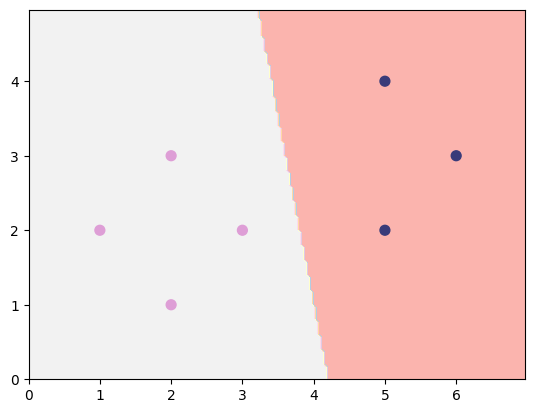

In [ ]:
clf = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
y_pred = clf.predict(seven_X)
plot_2d_clf_problem(seven_X, seven_y, h=clf.predict)
print(f"Tocnost predikcije RidgeClassifier je {accuracy_score(seven_y, y_pred)}")


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Tocnost predikcije LinearRegression je 1.0


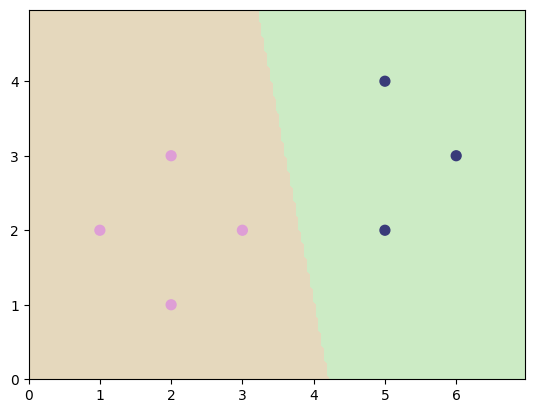

In [ ]:
reg = LinearRegression().fit(seven_X, seven_y)
y_pred = reg.predict(seven_X)
for i,y in enumerate(y_pred):
  if y >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0
plot_2d_clf_problem(seven_X, seven_y, lambda x : reg.predict(x) >= 0.5)
print(f"Tocnost predikcije LinearRegression je {accuracy_score(seven_y, y_pred)}")

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [ ]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Tocnost predikcije RidgeClassifier s outlier-om je 0.875


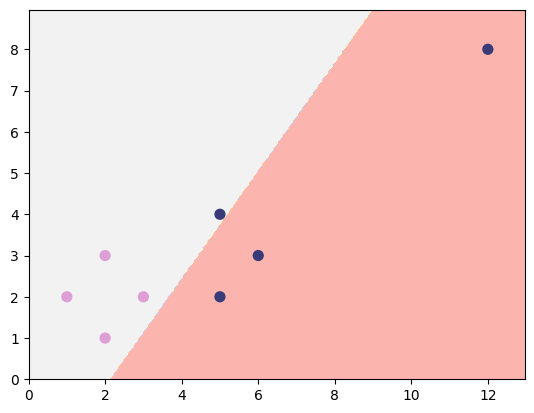

In [ ]:
clf = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
y_pred = clf.predict(outlier_X)
plot_2d_clf_problem(outlier_X, outlier_y, h=clf.predict)
print(f"Tocnost predikcije RidgeClassifier s outlier-om je {accuracy_score(outlier_y, y_pred)}")


**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [ ]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Tocnost predikcije RidgeClassifier na linearnom neodvojivom skupu je 0.875


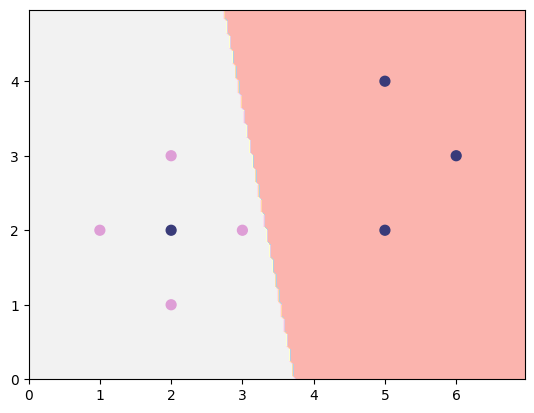

In [ ]:
clf = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
y_pred = clf.predict(unsep_X)
plot_2d_clf_problem(unsep_X, unsep_y, h=clf.predict)
print(f"Tocnost predikcije RidgeClassifier na linearnom neodvojivom skupu je {accuracy_score(unsep_y, y_pred)}")


**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

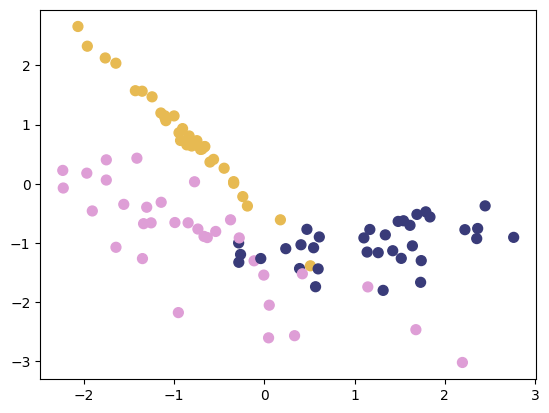

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Text(0.5, 1.0, 'Ridge Classifier direktno')

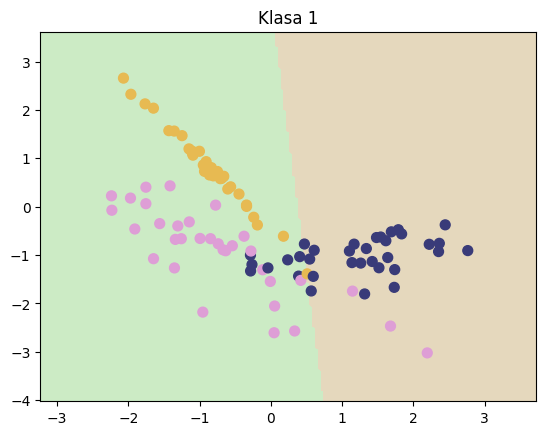

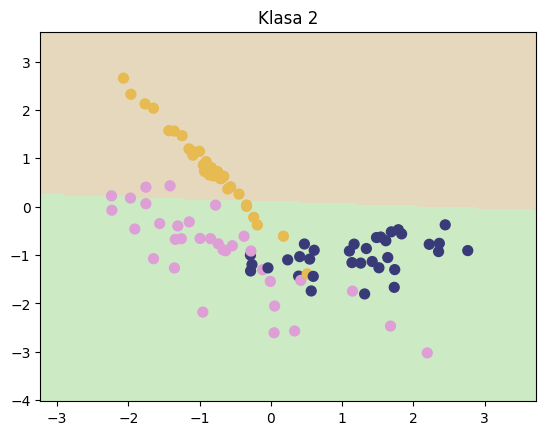

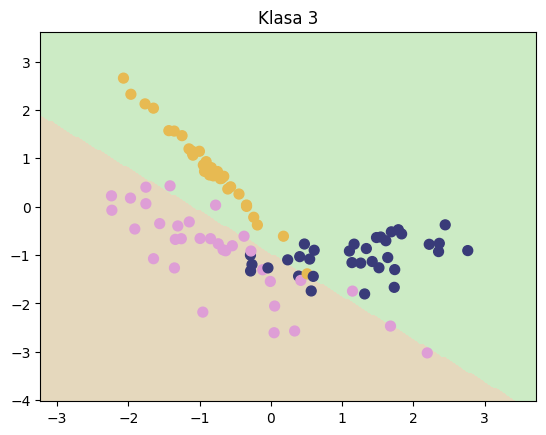

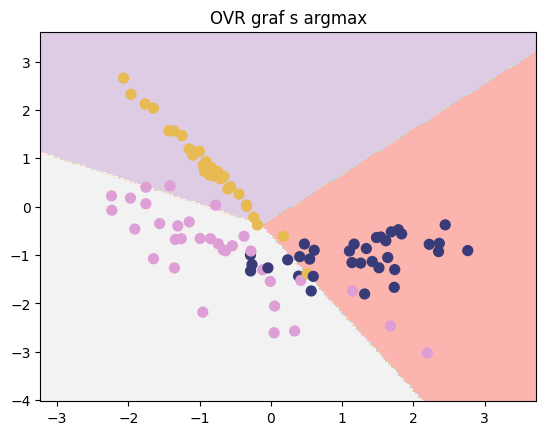

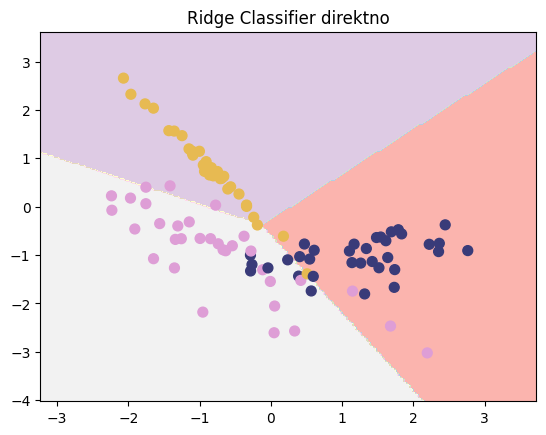

In [ ]:
y_1 = np.where(y==0, 1, 0)
y_2 = np.where(y==1, 1, 0)
y_3 = np.where(y==2, 1, 0)

h_1 = LinearRegression().fit(X, y_1)
h_2 = LinearRegression().fit(X, y_2)
h_3 = LinearRegression().fit(X, y_3)

plt.figure()
plot_2d_clf_problem(X, y, lambda x : h_1.predict(x) >= 0.5)
plt.title("Klasa 1")

plt.figure()
plot_2d_clf_problem(X, y, lambda x : h_2.predict(x) >= 0.5)
plt.title("Klasa 2")

plt.figure()
plot_2d_clf_problem(X, y, lambda x : h_3.predict(x) >= 0.5)
plt.title("Klasa 3")

def argmax_self(X):
  score_1 = h_1.predict(X)
  score_2 = h_2.predict(X)
  score_3 = h_3.predict(X)
  y_argmax=[]
  for (x1, x2, x3) in zip(score_1, score_2, score_3):
    l = [x1, x2, x3]
    y_argmax.append(l.index(max(l)))
  return np.array(y_argmax)

plt.figure()
plot_2d_clf_problem(X, y, argmax_self)
plt.title("OVR graf s argmax")

clf = RidgeClassifier(alpha=0).fit(X, y)
plt.figure()
plot_2d_clf_problem(X, y, clf.predict)
plt.title("Ridge Classifier direktno")


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

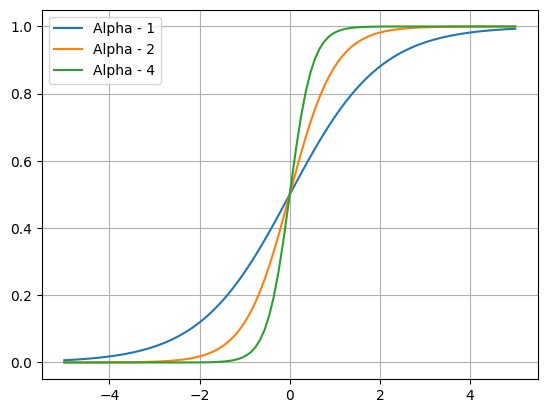

In [ ]:
def sigmoid(x, alpha=1):
  return 1 / (1+np.exp(-alpha*x))

x = np.linspace(-5,5,100)

alphas = [1,2,4]

#fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i,alpha in enumerate(alphas):
  y = sigmoid(x, alpha)
  plt.plot(x, y, label=f"Alpha - {alpha}")
plt.legend()
plt.grid(True)

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela?
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b)

Implementirajte funkciju

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)`

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [ ]:
from numpy import linalg

def lr_h(x, w):
  if len(x.shape) == 1:
    if x.shape[0] == w.shape[0]-1:
      x = np.hstack(([1], x))
  else:
    if x.shape[1] == w.shape[0]-1:
      ones = np.ones((x.shape[0], 1))
      x = np.hstack((ones, x))
  factor = np.dot(x, w)
  return sigmoid(factor)

def cross_entropy_error(X,y,w):
  pred = lr_h(X, w)
  factor = -(y * np.log(pred) + (1 - y) * np.log(1 - pred))
  return np.mean(factor)

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):

  ones = np.ones((X.shape[0], 1))
  X = np.hstack((ones, X))

  w = np.zeros(X.shape[1])
  trace_w = [] if trace==True else None

  for iter in range(max_iter):
    previous_error = cross_entropy_error(X, y, w)

    delta_w = np.zeros(X.shape[1])

    for i in range(X.shape[0]):
      #print(f"Primjer {i}")
      h = lr_h(X[i], w)
      delta_w -= (h-y[i]) * X[i]

    w[0] += eta*delta_w[0]
    w[1:] = w[1:] * (1 - eta * alpha) + eta * delta_w[1:]
    if trace:
      trace_w.append(w.copy())
    #print("Prije CEE")

    current_error = cross_entropy_error(X, y, w)
    if np.abs(previous_error - current_error) < epsilon:
      print(f"Zaustavljeno treniranje nakon {iter+1} iteracije")
      break
    previous_error = current_error

  if trace:
    return (w, trace_w)
  else:
    return w


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [ ]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Zaustavljeno treniranje nakon 947 iteracije
Tezine su [ 4.45449454 -1.71089242  0.68413507]
Pogreska unakrsne entropije je 0.13521872720206746


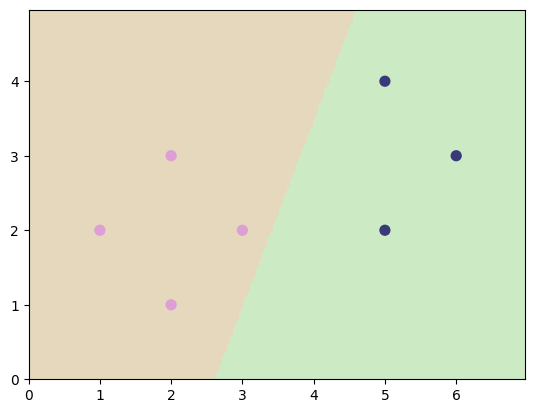

In [ ]:
w = lr_train(seven_X, seven_y, max_iter=2000, trace=False)
print(f"Tezine su {w}")
print(f"Pogreska unakrsne entropije je {cross_entropy_error(seven_X, seven_y, w)}")


plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) > 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [ ]:
from sklearn.metrics import zero_one_loss

Zaustavljeno treniranje nakon 947 iteracije
Zaustavljeno treniranje nakon 1149 iteracije
Zaustavljeno treniranje nakon 947 iteracije
Zaustavljeno treniranje nakon 511 iteracije
Zaustavljeno treniranje nakon 378 iteracije


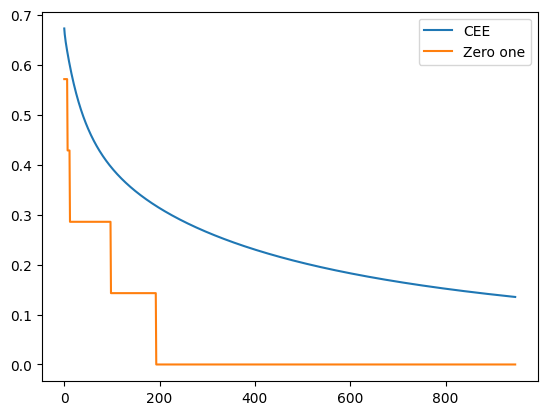

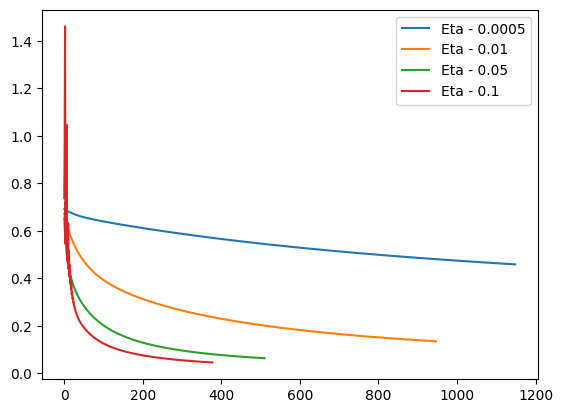

In [ ]:
w, w_iter = lr_train(seven_X, seven_y, max_iter=2000, trace=True)
errors_CEE = []
zero_one = []
for w_i in w_iter:
  errors_CEE.append(cross_entropy_error(seven_X, seven_y, w_i))
  h = lr_h(seven_X, w_i)
  y_pred = np.where(h>=0.5, 1, 0)
  zero_one.append(zero_one_loss(seven_y, y_pred))

plt.figure()
plt.plot(errors_CEE, label = "CEE")
plt.plot(zero_one, label = "Zero one")
plt.legend()

plt.figure()
lrs = [0.0005, 0.01, 0.05, 0.1]
for lr in lrs:
  w, w_iter = lr_train(seven_X, seven_y, eta=lr, max_iter=2000, trace=True)
  error_CEE = [cross_entropy_error(seven_X, seven_y, w_i) for w_i in w_iter]
  plt.plot(error_CEE, label = f"Eta - {lr}")
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Tezine [ 5.33129609 -1.18244419 -0.30251926] 


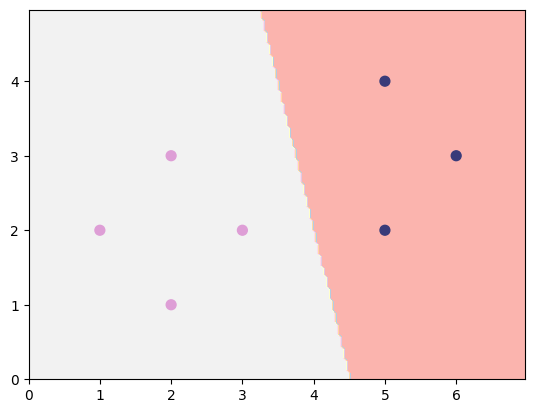

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(seven_X, seven_y)
w = np.hstack(([clf.intercept_], clf.coef_))[0]
print(f"Tezine {w} ")
plot_2d_clf_problem(seven_X, seven_y, clf.predict)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [ ]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

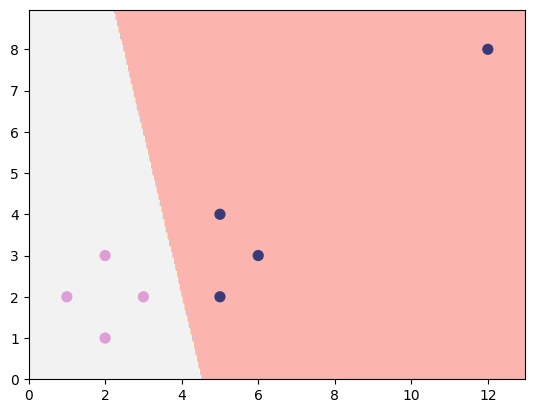

In [ ]:
clf = LogisticRegression().fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Zaustavljeno treniranje nakon 947 iteracije


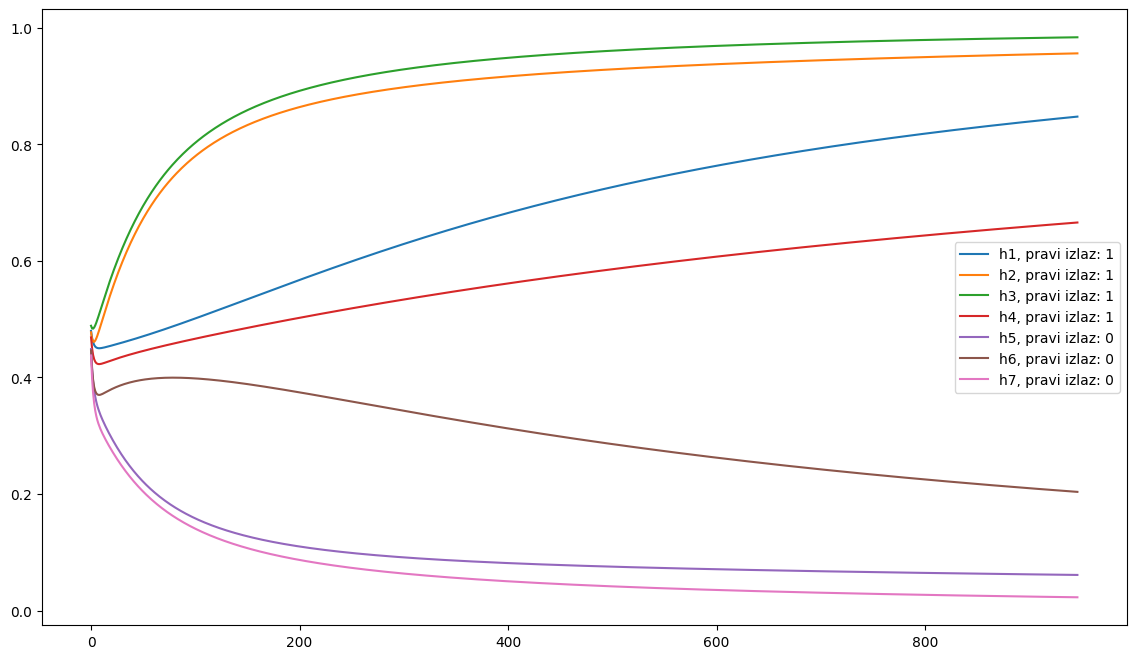

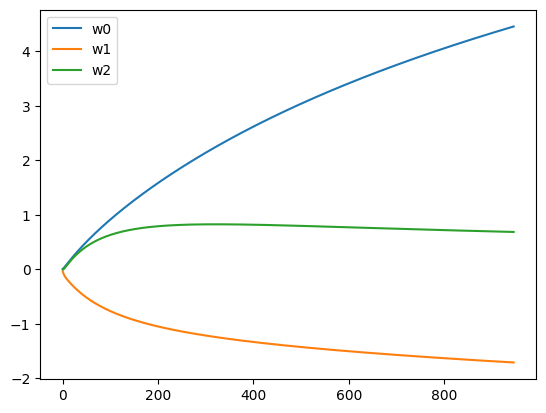

In [ ]:
w, w_iter = lr_train(seven_X, seven_y, max_iter=2000, trace=True)
h_iter = []
for x in seven_X:
  h_i = []
  for w_i in w_iter:
    h_i.append(lr_h(x, w_i))
  h_iter.append(h_i)

plt.figure(figsize=(14,8))
for i, h_i in enumerate(h_iter):
  plt.plot(h_i, label = f"h{i+1}, pravi izlaz: {seven_y[i]}")
plt.legend()

plt.figure()
w_iter_np = np.array(w_iter)
for i,w in enumerate(w_iter_np.T):
  plt.plot(w, label = f"w{i}")
plt.legend()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [ ]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Zaustavljeno treniranje nakon 454 iteracije


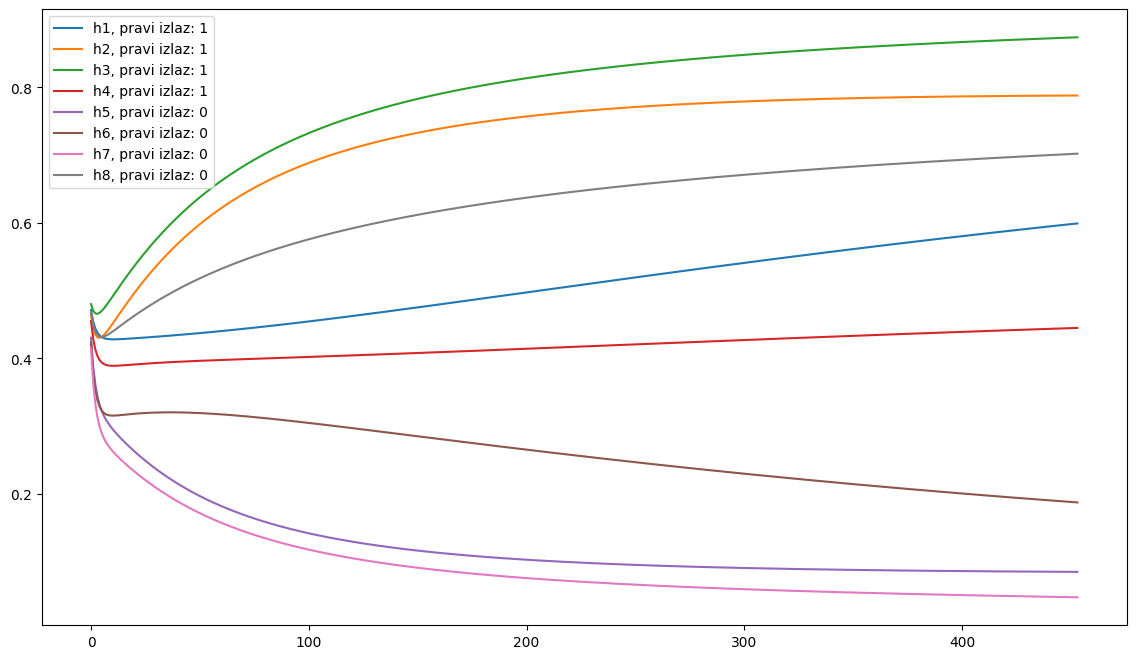

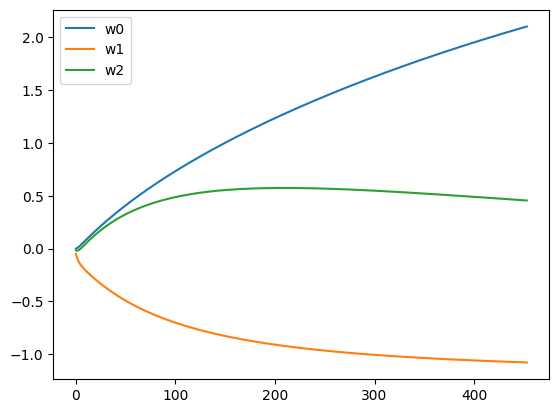

In [ ]:
w, w_iter = lr_train(unsep_X, unsep_y, max_iter=2000, trace=True)
h_iter = []
for x in unsep_X:
  h_i = []
  for w_i in w_iter:
    h_i.append(lr_h(x, w_i))
  h_iter.append(h_i)

plt.figure(figsize=(14,8))
for i, h_i in enumerate(h_iter):
  plt.plot(h_i, label = f"h{i+1}, pravi izlaz: {unsep_y[i]}")
plt.legend()

plt.figure()
w_iter_np = np.array(w_iter)
for i,w in enumerate(w_iter_np.T):
  plt.plot(w, label = f"w{i}")
plt.legend()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [ ]:
from numpy.linalg import norm

Zaustavljeno treniranje nakon 947 iteracije
Zaustavljeno treniranje nakon 804 iteracije
Zaustavljeno treniranje nakon 405 iteracije
Zaustavljeno treniranje nakon 4 iteracije


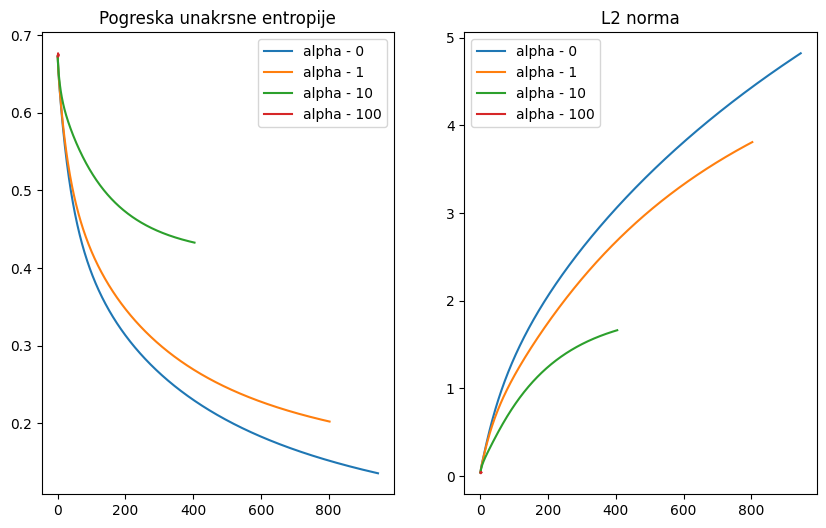

In [ ]:
alphas = [0,1,10,100]
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
for alpha in alphas:
  w, w_iter = lr_train(seven_X, seven_y, alpha=alpha, max_iter=2000, trace=True)
  cee = []
  l2_norm = []
  for w_i in w_iter:
    cee.append(cross_entropy_error(seven_X, seven_y, w_i))
    l2_norm.append(norm(w_i))
  axes[0].plot(cee, label = f"alpha - {alpha}")
  axes[1].plot(l2_norm, label = f"alpha - {alpha}")

axes[0].set_title("Pogreska unakrsne entropije")
axes[1].set_title("L2 norma")
axes[0].legend()
axes[1].legend()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

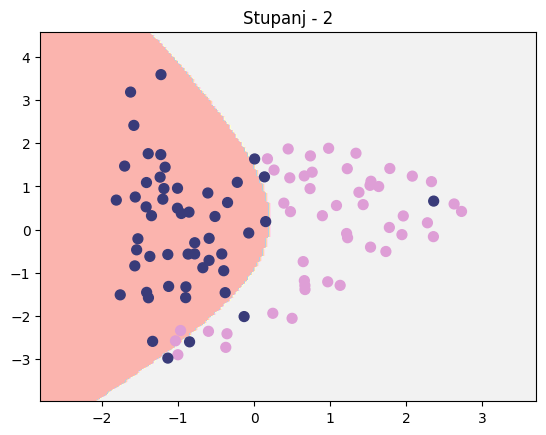

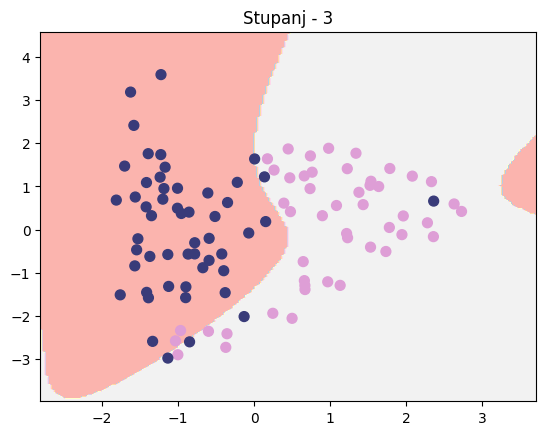

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3]
X, y = make_classification(n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)
for degree in degrees:
  poly_2 = PolynomialFeatures(degree=degree)
  X_2 = poly_2.fit_transform(X)
  clf = LogisticRegression().fit(X_2, y)
  plt.figure()
  plot_2d_clf_problem(X, y, lambda x : clf.predict(poly_2.transform(x)))
  plt.title(f"Stupanj - {degree}")



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?